In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Isinga import Ising
from time import process_time,time
%matplotlib widget

N = 50
Npoints = 30
step_stabilizzazione = 1001
step_media = 1001
temp = np.linspace(1,5,Npoints,endpoint=False)
E = np.zeros(len(temp))
M = np.zeros(len(temp))
C = np.zeros(len(temp))
Xi = np.zeros(len(temp))
tic = process_time()

for i in range(len(temp)):
    Et = 0
    Mt = 0
    Et2 = 0
    Mt2 = 0
    obj = Ising(temp=temp[i],N=N, conf = 1)
    
    for j in range(step_stabilizzazione):
        obj.evoluzionemc()
    for j in range(step_media):
        obj.evoluzionemc()
        Et += obj.energia()
        Mt += obj.magnetizzazione()
        #valori medi quadri
        Et2 += obj.energia()**2
        Mt2 += obj.magnetizzazione()**2
    
    norm1 = ((N**2)*step_media) 
    norm2 = ((N**2)*(step_media**2))
    E[i] = Et/norm1
    M[i] = Mt/norm1
    C[i] = ( Et2/norm1 - Et*Et/norm2 ) / ( temp [i] **2 )
    Xi[i] = (Mt2/norm1 - Mt*Mt/norm2 ) / ( temp [i] )
    
print(" cpu time for cycle t=", process_time()-tic)

 cpu time for cycle t= 58.9756226


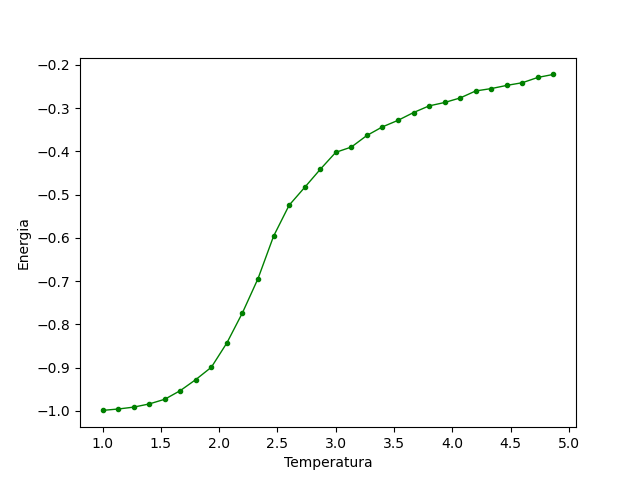

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from Isinga import Ising
from time import process_time,time
%matplotlib widget
#grafico energia
fig, ax = plt.subplots()
ax.plot(temp, E, linewidth=1.0, marker='.', color='g')
ax.set_xlabel('Temperatura')
ax.set_ylabel('Energia')
plt.show()

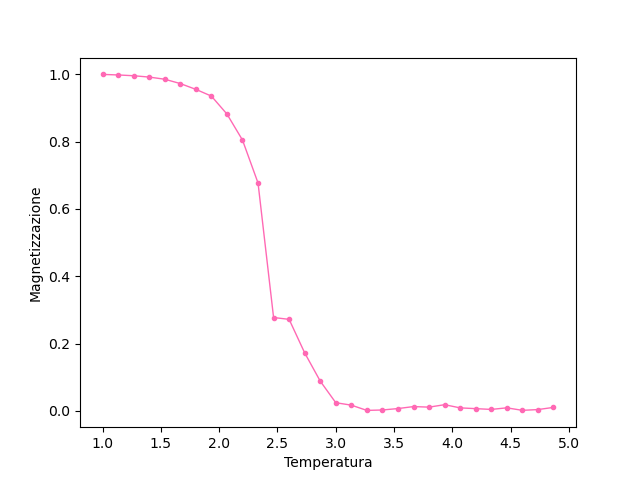

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from Isinga import Ising
from time import process_time,time
%matplotlib widget
#grafico magnetizzazione
fig, ax = plt.subplots()
ax.plot(temp, M, linewidth=1.0, marker='.', color = 'hotpink')
ax.set_xlabel('Temperatura')
ax.set_ylabel('Magnetizzazione')
plt.show()

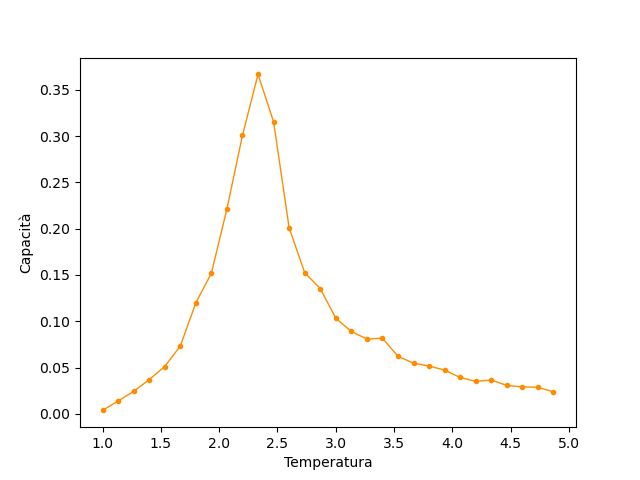

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from Isinga import Ising
from time import process_time,time
%matplotlib widget
#grafico capacità
fig, ax = plt.subplots()
ax.plot(temp, C, linewidth=1.0, marker='.', color = 'darkorange')
ax.set_xlabel('Temperatura')
ax.set_ylabel('Capacità')
plt.show()

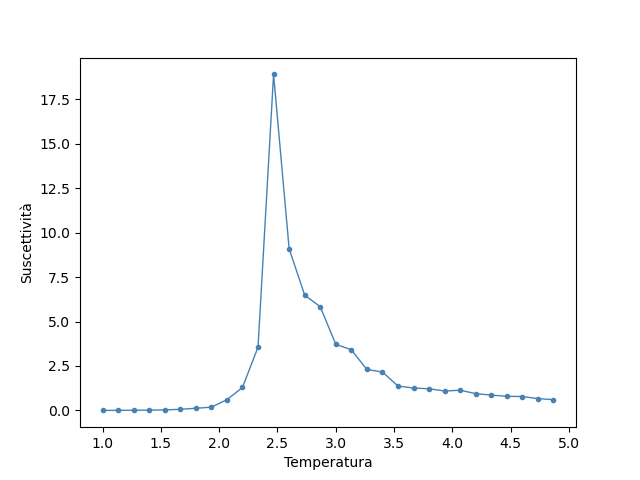

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from Isinga import Ising
from time import process_time,time
%matplotlib widget
#grafico suscettività
fig, ax = plt.subplots()
ax.plot(temp, Xi, linewidth=1.0, marker='.', color = 'steelblue')
ax.set_xlabel('Temperatura')
ax.set_ylabel('Suscettività')
plt.show()